<a href="https://colab.research.google.com/github/NoeelB/Bear-Attacks/blob/main/Noel's_BearDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data setup

## New data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!wget https://raw.githubusercontent.com/veronicaj8345/DSC-Mini-Project-Fall-2024/refs/heads/main/bears_complete.csv?token=GHSAT0AAAAAACZPPHOLEZSUSJE7NQ4LW3YSZY24D2A

--2024-10-25 00:05:21--  https://raw.githubusercontent.com/veronicaj8345/DSC-Mini-Project-Fall-2024/refs/heads/main/bears_complete.csv?token=GHSAT0AAAAAACZPPHOLEZSUSJE7NQ4LW3YSZY24D2A
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 59299 (58K) [text/plain]
Saving to: ‘bears_complete.csv?token=GHSAT0AAAAAACZPPHOLEZSUSJE7NQ4LW3YSZY24D2A’

bears_complete.csv? 100%[===================>]  57.91K  --.-KB/s    in 0.01s   

2024-10-25 00:05:21 (4.30 MB/s) - ‘bears_complete.csv?token=GHSAT0AAAAAACZPPHOLEZSUSJE7NQ4LW3YSZY24D2A’ saved [59299/59299]



In [ ]:
bears = pd.read_csv('bears_complete.csv?token=GHSAT0AAAAAACZPPHOLEZSUSJE7NQ4LW3YSZY24D2A')

In [ ]:
bears.head()

,Name,age,gender,Date,Month,Year,Type,Location,Description,Type of bear,Hunter,Grizzly,Hikers,Only one killed,Latitude,Longitude
0,Mary Porterfield,3.0,female,19/05/1901,May,1901,Wild,"Job, West Virginia",The children were gathering flowers near their...,Black bear,0,0,0,0,38.864277,-79.556998
1,Wilie Porterfield,5.0,male,19/05/1901,May,1901,Wild,"Job, West Virginia",The children were gathering flowers near their...,Black bear,0,0,0,0,38.864277,-79.556998
2,Henry Porterfield,7.0,male,19/05/1901,May,1901,Wild,"Job, West Virginia",The children were gathering flowers near their...,Black bear,0,0,0,0,38.864277,-79.556998
3,John Dicht,18.0,male,24/11/1906,Nov,1906,Wild,"Elk County, Pennsylvania","Thinking the bear was dead, Dicht began skinni...",Black bear,0,0,0,1,41.437362,-78.626009
4,Baby Laird,1.0,NaN,05/10/1908,Oct,1908,Captive,"Tucson, Arizona",After a bear escaped from a cage at Elysian Gr...,Black bear,0,0,0,1,32.222876,-110.974847


## Old data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!kaggle datasets download -d stealthtechnologies/bear-attacks-north-america

Dataset URL: https://www.kaggle.com/datasets/stealthtechnologies/bear-attacks-north-america
License(s): ODC Attribution License (ODC-By)
  0% 0.00/20.5k [00:00<?, ?B/s]
100% 20.5k/20.5k [00:00<00:00, 39.9MB/s]


In [ ]:
!unzip bear-attacks-north-america.zip

Archive:  bear-attacks-north-america.zip
  inflating: data (3).csv            


In [ ]:
# load csv
import pandas as pd
bears = pd.read_csv('data (3).csv')
bears.head()


,Name,age,gender,Date,Month,Year,Type,Location,Description,Type of bear,Hunter,Grizzly,Hikers,Only one killed,Latitude,Longitude
0,Mary Porterfield,3.0,female,19/05/1901,May,1901,Wild,"Job, West Virginia",The children were gathering flowers near their...,Black bear,0,0,0,0,38.864277,-79.556998
1,Wilie Porterfield,5.0,male,19/05/1901,May,1901,Wild,"Job, West Virginia",The children were gathering flowers near their...,Black bear,0,0,0,0,38.864277,-79.556998
2,Henry Porterfield,7.0,male,19/05/1901,May,1901,Wild,"Job, West Virginia",The children were gathering flowers near their...,Black bear,0,0,0,0,38.864277,-79.556998
3,John Dicht,18.0,male,24/11/1906,Nov,1906,Wild,"Elk County, Pennsylvania","Thinking the bear was dead, Dicht began skinni...",Black bear,0,0,0,1,41.437362,-78.626009
4,Baby Laird,1.0,NaN,05/10/1908,Oct,1908,Captive,"Tucson, Arizona",After a bear escaped from a cage at Elysian Gr...,Black bear,0,0,0,1,32.222876,-110.974847


In [ ]:
# the gender column has some messy data
# clean it up, check to see if values have been coerced into just male or female
bears['gender'] = bears['gender'].str.strip()
print(bears['gender'].value_counts())


gender
male      122
female     43
Name: count, dtype: int64


# Graphs

## Word cloud

In [ ]:
!pip install wordcloud

In [ ]:
from wordcloud import WordCloud
from collections import Counter

In [ ]:
# Combine all descriptions into a single string
text = ' '.join(bears['Description'].dropna())

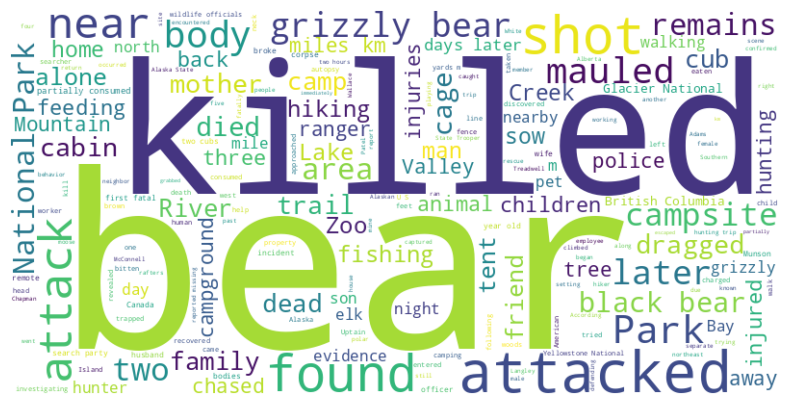

In [ ]:
# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.show()


In [ ]:
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    if word in wild_words and word in captive_words:
        return "purple"  # Common words in both
    elif word in wild_words:
        return "blue"  # Wild bear words
    elif word in captive_words:
        return "red"  # Captive bear words
    else:
        return "black"  # Default color (shouldn't be reached)


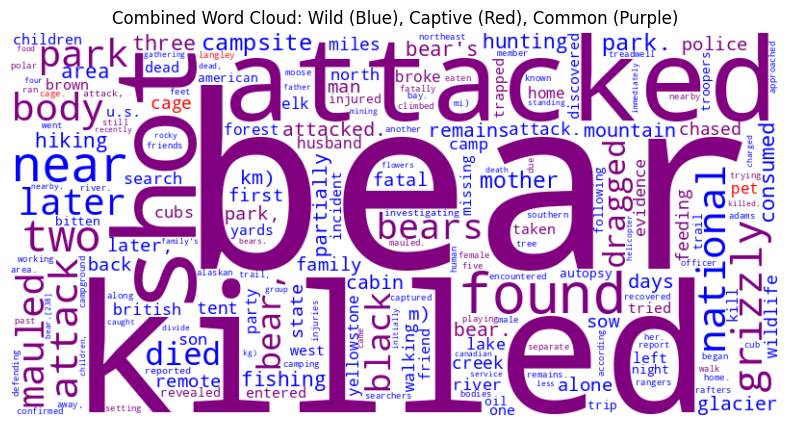

In [ ]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from collections import Counter

# Assuming your dataset is already loaded into 'bears'

# Step 2: Define a function to filter stopwords
def filter_stopwords(text, stopwords):
    words = text.lower().split()
    return [word for word in words if word not in stopwords]

# Step 3: Combine descriptions and filter out stopwords
wild_text = ' '.join(bears[bears['Type'] == 'Wild']['Description'].dropna())
captive_text = ' '.join(bears[bears['Type'] == 'Captive']['Description'].dropna())

# Define additional stopwords
custom_stopwords = set(STOPWORDS).union({"the", "was", "and", "that", "of", "to", "in", "for", "it", "on", "a", "is", "with", "as", "by", "this", "an", "at", "from"})

# Filter stopwords from both texts
filtered_wild_words = filter_stopwords(wild_text, custom_stopwords)
filtered_captive_words = filter_stopwords(captive_text, custom_stopwords)

# Count word frequencies for each type
wild_words_count = Counter(filtered_wild_words)
captive_words_count = Counter(filtered_captive_words)

# Combine counts to create a single frequency dictionary
combined_words = wild_words_count + captive_words_count

# Step 4: Create the combined word cloud with custom color mapping
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    if word in wild_words_count and word in captive_words_count:
        return "purple"  # Common words in both
    elif word in wild_words_count:
        return "blue"  # Wild bear words
    elif word in captive_words_count:
        return "red"  # Captive bear words
    else:
        return "black"  # Default color

# Generate the word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    color_func=color_func
).generate_from_frequencies(combined_words)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Combined Word Cloud: Wild (Blue), Captive (Red), Common (Purple)')
plt.show()



## Bear map

In [ ]:
import geopandas as gpd

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(bears, geometry=gpd.points_from_xy(bears['Longitude'], bears['Latitude']))

# Set the coordinate reference system (CRS) to WGS84 (EPSG:4326)
gdf.set_crs(epsg=4326, inplace=True)


,Name,age,gender,Date,Month,Year,Type,Location,Description,Type of bear,Hunter,Grizzly,Hikers,Only one killed,Latitude,Longitude,geometry
0,Mary Porterfield,3.000000,female,19/05/1901,May,1901,Wild,"Job, West Virginia",The children were gathering flowers near their...,Black bear,0,0,0,0,38.864277,-79.556998,POINT (-79.557 38.86428)
1,Wilie Porterfield,5.000000,male,19/05/1901,May,1901,Wild,"Job, West Virginia",The children were gathering flowers near their...,Black bear,0,0,0,0,38.864277,-79.556998,POINT (-79.557 38.86428)
2,Henry Porterfield,7.000000,male,19/05/1901,May,1901,Wild,"Job, West Virginia",The children were gathering flowers near their...,Black bear,0,0,0,0,38.864277,-79.556998,POINT (-79.557 38.86428)
3,John Dicht,18.000000,male,24/11/1906,Nov,1906,Wild,"Elk County, Pennsylvania","Thinking the bear was dead, Dicht began skinni...",Black bear,0,0,0,1,41.437362,-78.626009,POINT (-78.62601 41.43736)
4,Baby Laird,1.000000,NaN,05/10/1908,Oct,1908,Captive,"Tucson, Arizona",After a bear escaped from a cage at Elysian Gr...,Black bear,0,0,0,1,32.222876,-110.974847,POINT (-110.97485 32.22288)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,Aaron Gibbons,31.000000,male,03/07/2018,Jul,2018,Wild,"Sentry Island, Nunavut",A polar bear approached a man and his children...,Polar Bear,0,0,0,1,61.158817,-93.864510,POINT (-93.86451 61.15882)
162,Mark Uptain,37.000000,male,14/09/2018,Sep,2018,Wild,"Teton Wilderness, Wyoming","Uptain, a guide for Martin Outfitters, was cle...",Brown bear,0,0,0,1,44.043049,-110.192303,POINT (-110.1923 44.04305)
163,Anthony David Montoya,18.000000,male,01/10/2018,Oct,2018,Wild,"Admiralty Island, Alaska",Montoya was working at a remote mining site on...,Brown bear,0,0,0,1,57.713324,-134.409838,POINT (-134.40984 57.71332)
164,Valérie Théorêt,37.000000,female,26/11/2018,Nov,2018,Wild,"Einarson Lake, Yukon",The mother and child were attacked near their ...,Brown bear,0,0,0,0,63.922365,-131.607587,POINT (-131.60759 63.92236)


In [ ]:
bears.groupby(['Type of bear', 'Type']).size()



Type of bear  Type   
Black bear    Captive    16
              Wild       60
Brown bear    Captive     8
              Wild       72
Polar Bear    Captive     4
              Wild        6
dtype: int64

In [ ]:
import geopandas as gpd

# Load the shapefile directly from the .zip file
shapefile_path = 'USA_Canada_ShapefileMerge.zip'
north_america = gpd.read_file(f"/content/USA_Canada_ShapefileMerge.zip")


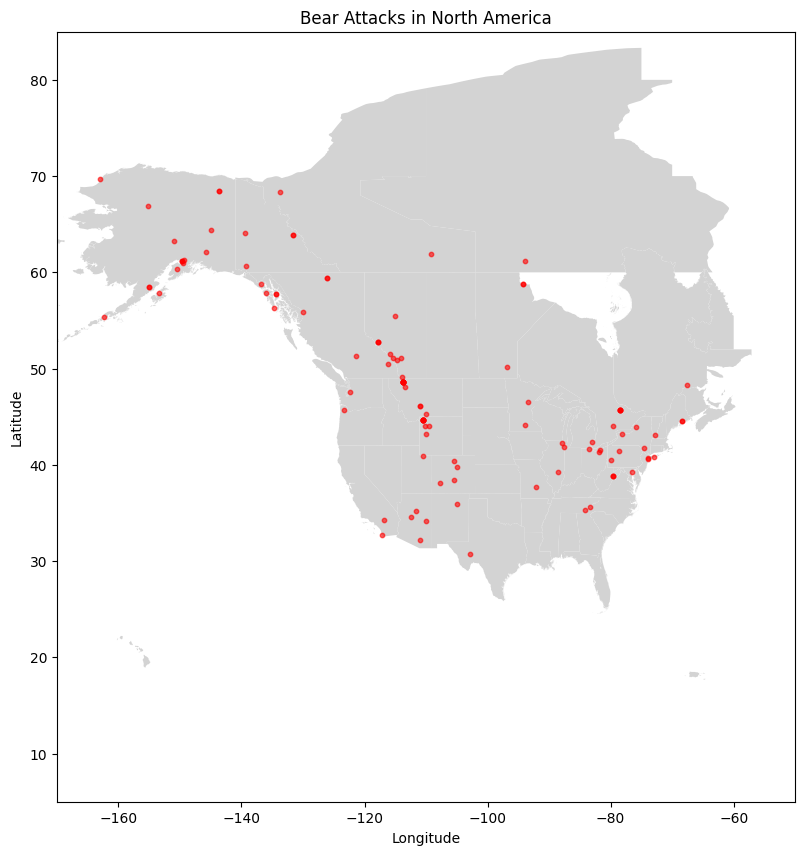

In [ ]:
# Plot the map of North America
fig, ax = plt.subplots(figsize=(10, 10))
north_america.plot(ax=ax, color='lightgray')  # Plot shapefile of North America

# Plot the bear attack points
gdf.plot(ax=ax, color='red', markersize=10, alpha=0.6)

# Zoom to specific extent (Longitude and Latitude bounds for North America)
ax.set_xlim([-170, -50])  # Longitude range
ax.set_ylim([5, 85])      # Latitude range


plt.title("Bear Attacks in North America")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.show()


In [ ]:
bears.to_excel("bears_missing_coordinates.xlsx", index=False)


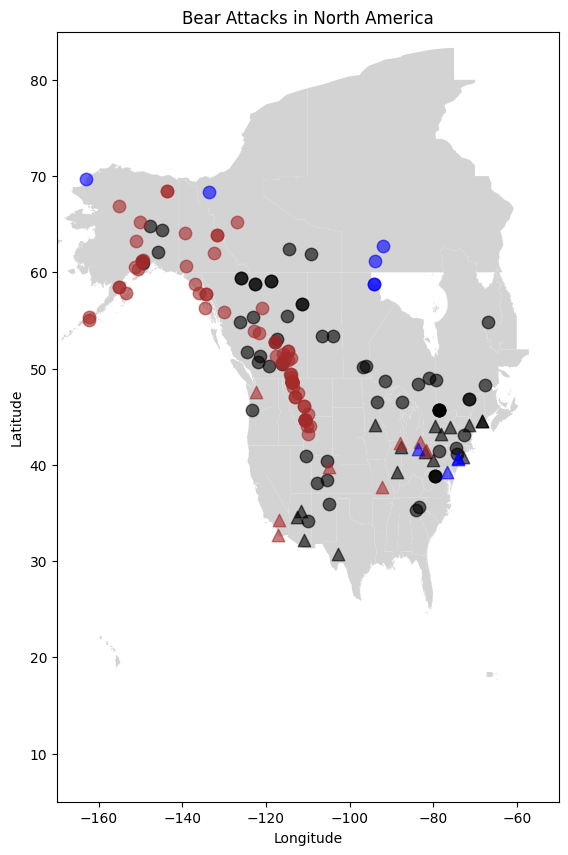

In [ ]:
# Example: Assume your DataFrame has 'Type of bear' and 'Type' columns
# Assign colors for 'Type of bear'
color_mapping = {
    'Brown bear': 'brown',
    'Black bear': 'black',
    'Polar Bear': 'blue'
}

# Assign markers for 'Type' (for example, distinguishing types of incidents)
marker_mapping = {
    'Wild': 'o',     # Circle marker for wild
    'Captive': '^'   # Triangle marker for captive
}

# Plot the map of North America
fig, ax = plt.subplots(figsize=(10, 10))
north_america.plot(ax=ax, color='lightgray')  # Plot shapefile of North America

# Plot the points, adjusting color and marker by 'Type of bear' and 'Type'
for bear_type, marker_type in gdf.groupby(['Type of bear', 'Type']):
    # Extract subset of data
    subset = gdf[(gdf['Type of bear'] == bear_type[0]) & (gdf['Type'] == bear_type[1])]

    # Plot the subset with specific color and marker
    subset.plot(
        ax=ax,
        color=color_mapping[bear_type[0]],         # Color by 'Type of bear'
        marker=marker_mapping[bear_type[1]],       # Marker by 'Type'
        markersize=80,                             # Adjust marker size
        label=f"{bear_type[0]} - {bear_type[1]}",  # Label for legend
        alpha=0.6
    )


# Zoom to specific extent (Longitude and Latitude bounds for North America)
ax.set_xlim([-170, -50])  # Longitude range
ax.set_ylim([5, 85])      # Latitude range


plt.title("Bear Attacks in North America")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.show()


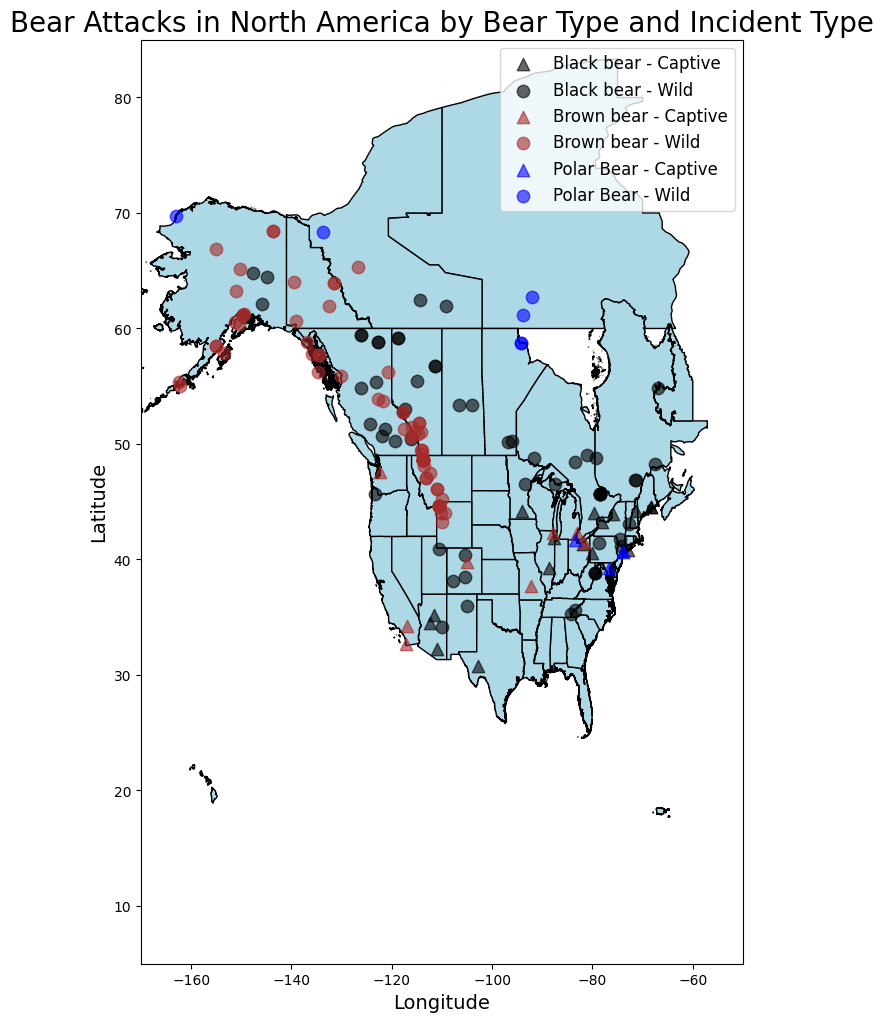

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Example: Assume your DataFrame has 'Type of bear' and 'Type' columns
# Assign colors for 'Type of bear'
color_mapping = {
    'Brown bear': 'brown',
    'Black bear': 'black',
    'Polar Bear': 'blue'
}

# Assign markers for 'Type' (for example, distinguishing types of incidents)
marker_mapping = {
    'Wild': 'o',     # Circle marker for wild
    'Captive': '^'   # Triangle marker for captive
}

# Create a plot
fig, ax = plt.subplots(figsize=(12, 12))

# Plot the base map (North America shapefile)
north_america.plot(ax=ax, color='lightblue', edgecolor='black')

# Zoom to specific extent (Longitude and Latitude bounds for North America)
ax.set_xlim([-170, -50])  # Longitude range
ax.set_ylim([5, 85])      # Latitude range


# Plot the points, adjusting color and marker by 'Type of bear' and 'Type'
for bear_type, marker_type in gdf.groupby(['Type of bear', 'Type']):
    # Extract subset of data
    subset = gdf[(gdf['Type of bear'] == bear_type[0]) & (gdf['Type'] == bear_type[1])]

    # Plot the subset with specific color and marker
    subset.plot(
        ax=ax,
        color=color_mapping[bear_type[0]],         # Color by 'Type of bear'
        marker=marker_mapping[bear_type[1]],       # Marker by 'Type'
        markersize=80,                             # Adjust marker size
        label=f"{bear_type[0]} - {bear_type[1]}",  # Label for legend
        alpha=0.6
    )

# Customize the plot with labels, legend, etc.
plt.title("Bear Attacks in North America by Bear Type and Incident Type", fontsize=20)
plt.xlabel("Longitude", fontsize=14)
plt.ylabel("Latitude", fontsize=14)
plt.legend(loc='upper right', fontsize=12)  # Show legend with different bear types and incident types

plt.show()


In [ ]:
pip install geopandas matplotlib contextily


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 44.5 MB/s eta 0:00:00


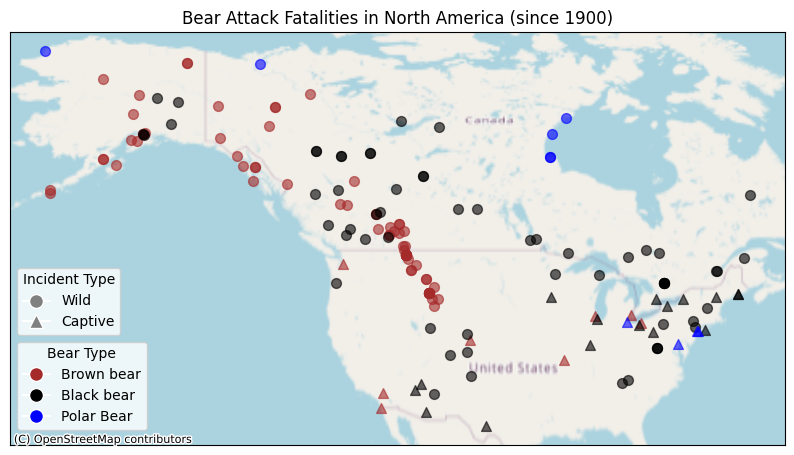

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from matplotlib.lines import Line2D

# Create a GeoDataFrame using 'bears' dataframe
bears_gdf = gpd.GeoDataFrame(
    bears,
    geometry=gpd.points_from_xy(bears.Longitude, bears.Latitude),
    crs="EPSG:4326"  # Assuming your data is in WGS84
)

# Define color and marker mappings
color_mapping = {
    'Brown bear': 'brown',
    'Black bear': 'black',
    'Polar Bear': 'blue'
}

marker_mapping = {
    'Wild': 'o',    # Circle marker for wild incidents
    'Captive': '^'  # Triangle marker for captive incidents
}

# Create a map plot
fig, ax = plt.subplots(figsize=(10, 10))

# Iterate through each bear type and plot the data points
for bear_type, color in color_mapping.items():
    for incident_type, marker in marker_mapping.items():
        subset = bears_gdf[(bears_gdf['Type of bear'] == bear_type) & (bears_gdf['Type'] == incident_type)]
        subset.plot(
            ax=ax,
            color=color,
            marker=marker,
            markersize=50,  # Adjust size as needed
            label=f"{bear_type} ({incident_type})",
            alpha=0.6
        )

# Add a basemap for context (using OpenStreetMap's Mapnik as a fallback)
ctx.add_basemap(ax, crs=bears_gdf.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)

# Remove longitude and latitude markings
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('')
ax.set_ylabel('')

# Create a custom legend for colors (bear types)
color_legend_elements = [Line2D([0], [0], marker='o', color='w', label=bear_type,
                                markerfacecolor=color, markersize=10) for bear_type, color in color_mapping.items()]

color_legend = ax.legend(handles=color_legend_elements, title="Bear Type", loc='lower left', bbox_to_anchor=(0, 0.02), frameon=True)

# Create a custom legend for markers (incident types)
marker_legend_elements = [Line2D([0], [0], marker=marker, color='w', label=incident_type,
                                 markerfacecolor='grey', markersize=10) for incident_type, marker in marker_mapping.items()]

marker_legend = ax.legend(handles=marker_legend_elements, title="Incident Type", loc='lower left', bbox_to_anchor=(0, 0.25), frameon=True)

# Add the first legend back (so both show)
ax.add_artist(color_legend)

# Customize plot
plt.title("Bear Attack Fatalities in North America (since 1900)")
plt.show()


## Interactive map

In [ ]:
import folium

# Create a base map
m = folium.Map(location=[bears['Latitude'].mean(), bears['Longitude'].mean()], zoom_start=4)

# Define color mapping for bear types
color_mapping = {
    'Brown bear': 'brown',
    'Black bear': 'black',
    'Polar Bear': 'blue'
}

# Define a function to create a wrapped popup with date, type, and description
def create_popup(date, bear_type, description):
    return folium.Popup(
        f'<div style="max-width: 200px;"><strong>Date:</strong> {date}<br>'
        f'<strong>Type:</strong> {bear_type}<br>'
        f'<strong>Description:</strong> {description}</div>',
        max_width=200
    )

# Iterate through the DataFrame and add markers
for _, row in bears.iterrows():
    # Get the bear type, description, date, and type of incident
    bear_type = row['Type of bear']
    description = row['Description']
    date = row['Date']
    incident_type = row['Type']  # This is 'Wild' or 'Captive'

    # Determine marker color
    color = color_mapping.get(bear_type, 'gray')  # Default to gray if bear type not found

    # Create a popup with the date, type, and description
    popup = create_popup(date, incident_type, description)

    # Add a marker to the map
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        icon=folium.Icon(color=color),  # Use a single color marker
        popup=popup  # Use popup here
    ).add_to(m)

# Save the map to an HTML file
m.save("bear_attacks_interactive_map.html")

# Display the map in a Jupyter notebook (if applicable)
m




<ipython-input-73-32cb9e9b7a92>:39: UserWarning: color argument of Icon should be one of: {'lightgreen', 'black', 'white', 'lightblue', 'darkred', 'lightred', 'lightgray', 'pink', 'gray', 'blue', 'darkblue', 'beige', 'red', 'purple', 'orange', 'darkpurple', 'cadetblue', 'darkgreen', 'green'}.
  icon=folium.Icon(color=color),  # Use a single color marker


<ipython-input-8-9bb49e73d7ba>:8: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  bears['year'] = pd.to_datetime(bears['Date']).dt.year


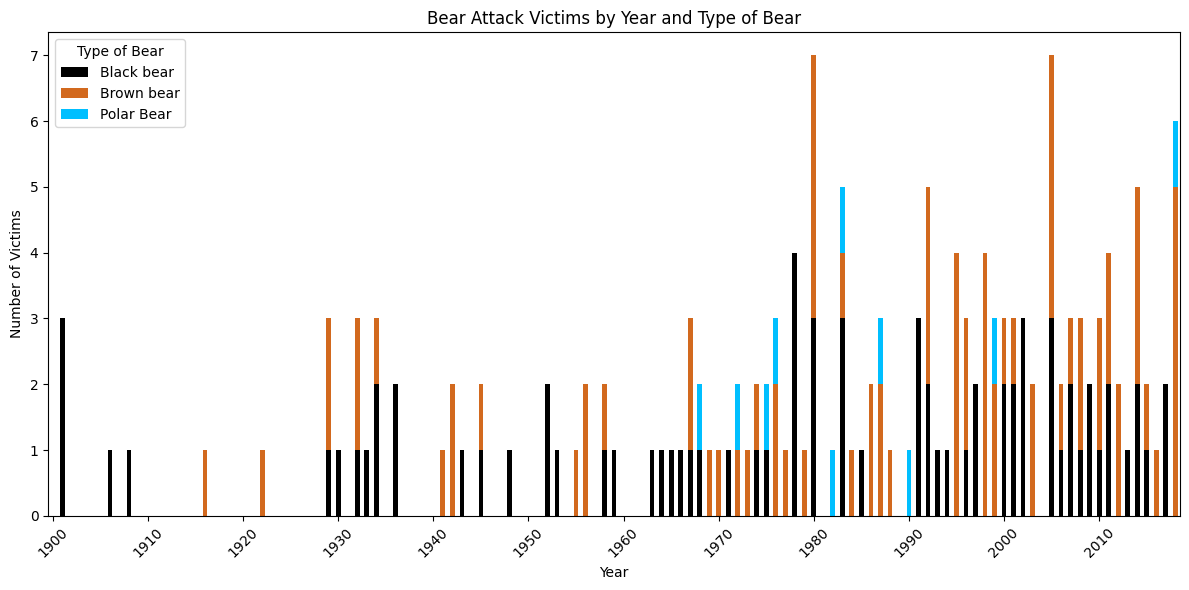

In [ ]:
#@title Bear Attack Victims by Year and Type of Bear

import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataframe is named 'bears'
# Step 1: Extract year from the "Date" column
bears['year'] = pd.to_datetime(bears['Date']).dt.year

# Step 2: Create a complete range of years
all_years = pd.DataFrame({'year': range(bears['year'].min() - 1, bears['year'].max() + 1)})

# Step 3: Group by year and Type of bear, then count the number of victims
grouped = bears.groupby(['year', 'Type of bear']).size().unstack(fill_value=0)

# Step 4: Merge with all_years to include missing years with no attacks
grouped = all_years.merge(grouped, on='year', how='left').fillna(0)

# Step 5: Set "year" as index for plotting
grouped.set_index('year', inplace=True)

# Step 6: Adjust figure size and plot the stacked bar chart, color coding by bear type
plt.figure(figsize=(12, 6))
ax = grouped.plot(kind='bar', stacked=True,
                  color=['black', 'chocolate', 'deepskyblue'],
                  ax=plt.gca())

# Step 7: Customize the plot
plt.title('Bear Attack Victims by Year and Type of Bear')
plt.ylabel('Number of Victims')
plt.xlabel('Year')

# Step 8: Set custom x-tick labels for every 10 years
tick_positions = range(0, len(grouped), 10)
ax.set_xticks(tick_positions)
ax.set_xticklabels(grouped.index[tick_positions], rotation=45)

plt.legend(title='Type of Bear')
plt.tight_layout()

# Show the plot
plt.show()


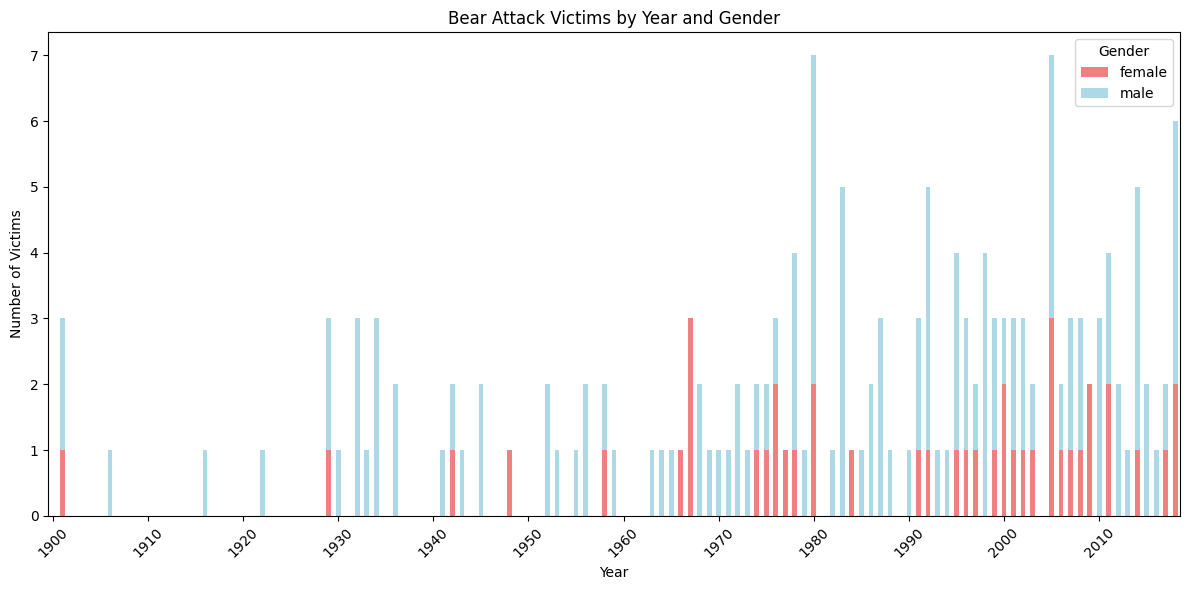

In [ ]:
#@title Bear Attack Victims by Year and Gender
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataframe is named 'bears'
# Step 1: Extract year from the "Date" column
bears['year'] = pd.to_datetime(bears['Date']).dt.year

# Step 2: Create a complete range of years
all_years = pd.DataFrame({'year': range(bears['year'].min() - 1, bears['year'].max() + 1)})

# Step 3: Group by year and gender, then count the number of victims
grouped = bears.groupby(['year', 'gender']).size().unstack(fill_value=0)

# Step 4: Merge with all_years to include missing years with no attacks
grouped = all_years.merge(grouped, on='year', how='left').fillna(0)

# Step 5: Set "year" as index for plotting (no need to rename columns)
grouped.set_index('year', inplace=True)

# Step 6: Adjust figure size and plot the stacked bar chart
plt.figure(figsize=(12, 6))
ax = grouped.plot(kind='bar', stacked=True, color=['lightcoral', 'lightblue'], ax=plt.gca())

# Step 7: Customize the plot
plt.title('Bear Attack Victims by Year and Gender')
plt.ylabel('Number of Victims')
plt.xlabel('Year')

# Step 8: Set custom x-tick labels for every 10 years
tick_positions = range(0, len(grouped), 10)
ax.set_xticks(tick_positions)
ax.set_xticklabels(grouped.index[tick_positions], rotation=45)

plt.legend(title='Gender')
plt.tight_layout()

# Show the plot
plt.show()


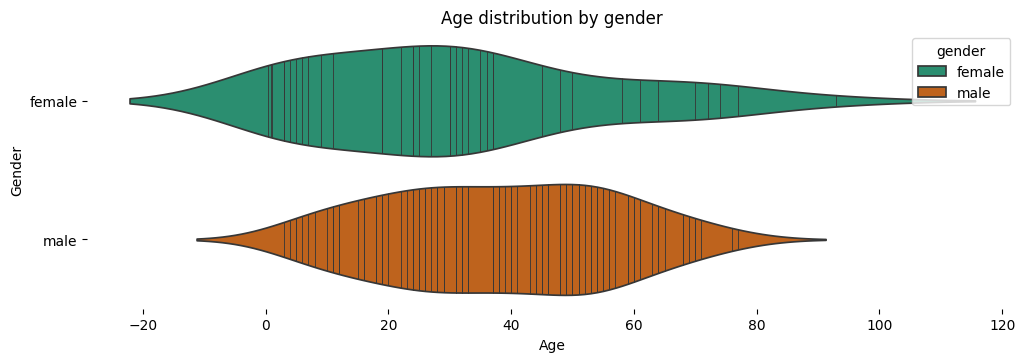

In [ ]:
# @title gender vs  age

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['gender'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x=' age', y='gender', inner='stick', palette='Dark2', hue='gender')
plt.title('Age distribution by gender')
plt.xlabel('Age')
plt.ylabel('Gender')
sns.despine(top=True, right=True, bottom=True, left=True)

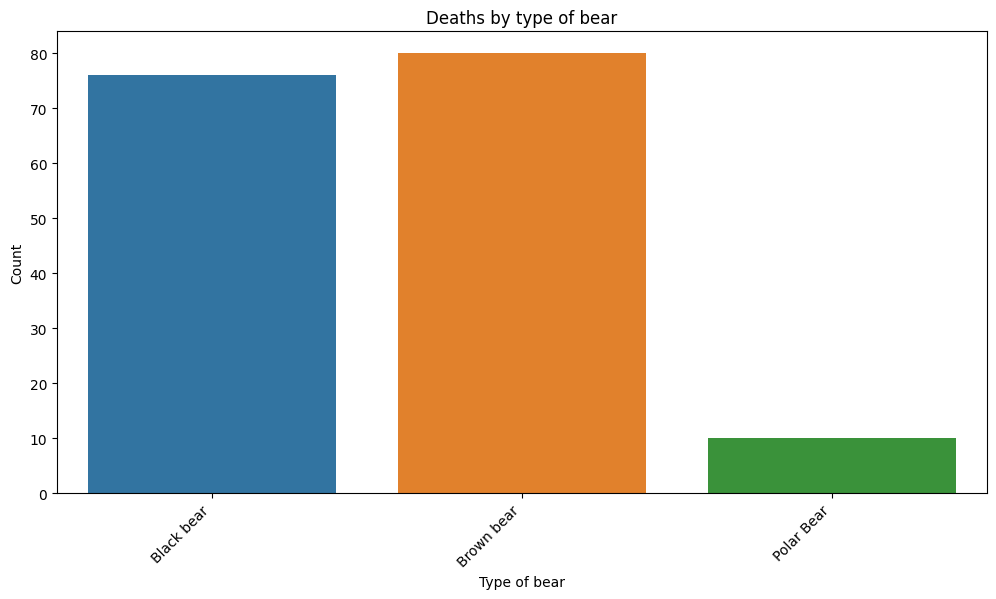

In [ ]:
# @title Type of bear
plt.figure(figsize=(12, 6))
sns.countplot(x='Type of bear', hue = "Type of bear", data=data)
plt.title('Deaths by type of bear')
plt.xlabel('Type of bear')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()
